In [27]:
!pip install nltk
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [28]:

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/cse 42 thesis/merged_dataset.csv'
df = pd.read_csv(data_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,text
0,1,গলায় বিধেঁছে মাছের কাঁ’টা ? জেনে নিন ছাড়িয়ে ন...
1,1,এয়ার ফ্রেশনার ব্যবহার করে রোগ ঢেকে আনছেন না তো?
2,1,ছবিটিতে প্রথমে কী দেখেছেন তার ওপর নির্ভর করছে ...
3,1,দিল্লির দিনমজুরদের জন্য ‘মন্দ মেয়ে’র মানবিকতা
4,1,"আমি নির্দোষ, মিথ্যা মামলায় ফাঁসানো হয়েছে"
...,...,...
15133,1,ব্রাজিল ডিফেন্ডারকে ঘুমের ওষুধ খাইয়ে ম্যাচ জি...
15134,1,এবার নববধূর সাজে হাজির হয়ে সকলকে তাক লাগিয়ে দি...
15135,1,দেশের যেখানে টাকার বিনিময়ে ২০ দিনের জন্য বিয়ে
15136,1,হোটেলের রুমে তরুণীর সঙ্গে মারামারি করেছে বিখ্য...


In [29]:
# Handle Bengali stopwords
stopwords = ["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]
nltk.download('punkt')

# Tokenize the text
tokenized_text = []
for sentence in df['text']:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stopwords]
    tokenized_text.append(filtered_tokens)

df['tokenized_text'] = tokenized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Split the dataset into training and testing sets
X = df['tokenized_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform word encoding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Pad sequences
max_length = 100
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_length, padding='post')

In [31]:
# Build the BiLSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
379/379 [==============================] - 132s 305ms/step - loss: 0.5524 - accuracy: 0.7212 - val_loss: 0.4901 - val_accuracy: 0.7662
Epoch 2/10
379/379 [==============================] - 111s 293ms/step - loss: 0.3010 - accuracy: 0.8778 - val_loss: 0.5397 - val_accuracy: 0.7408
Epoch 3/10
379/379 [==============================] - 100s 263ms/step - loss: 0.1339 - accuracy: 0.9530 - val_loss: 0.7340 - val_accuracy: 0.7282
Epoch 4/10
95/95 [==============================] - 6s 67ms/step - loss: 0.4901 - accuracy: 0.7662
Validation Loss: 0.4901062548160553
Validation Accuracy: 0.7661823034286499


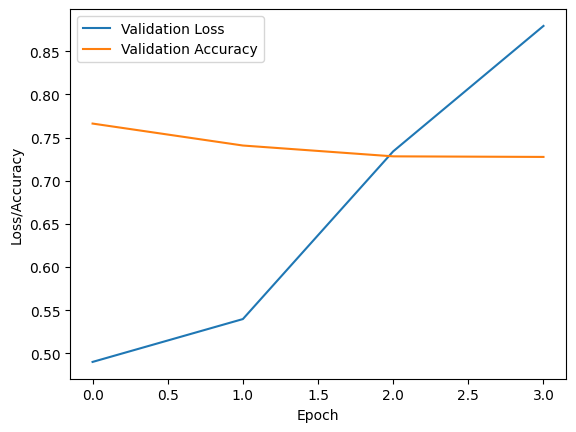

In [32]:

import matplotlib.pyplot as plt

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, callbacks=[early_stopping])

# Print validation loss and accuracy
val_loss, val_acc = model.evaluate(X_test_padded, y_test)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

# Plot validation loss and accuracy
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


In [52]:
y_pred=model.predict(X_test_padded)
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

95/95 [==============================] - 5s 54ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.6416776750330251

In [63]:
import numpy as np
!pip install lime
# Interpret the sample sentence using LIME
import lime
import lime.lime_text

# Select a sample sentence for interpretation
sample_sentence = df.loc[2, 'text']

print(sample_sentence)
print(len(sample_sentence.split()))


ছবিটিতে প্রথমে কী দেখেছেন তার ওপর নির্ভর করছে আপনার ব্যক্তিত্ব
10


In [65]:
# Create the explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['Non-Clickbait', 'Clickbait'])

# Define a predict function that returns predicted probabilities
def predict_fn(texts):
    encoded_texts = tokenizer.texts_to_sequences(texts)
    padded_texts = pad_sequences(encoded_texts, maxlen=max_length, padding='post')
    return model.predict(padded_texts)

# Interpret the sample sentence
explanation = explainer.explain_instance(
data_row=sample_sentence, ##new data
predict_fn=model.predict,
num_features=4,
labels=(0,)
)

# Show the results
explanation.show_in_notebook(text=True)

TypeError: LimeTextExplainer.explain_instance() got an unexpected keyword argument 'data_row'

In [58]:
# Define a predict function that returns predicted probabilities
def predict_fn(texts):
    encoded_texts = tokenizer.texts_to_sequences(texts)
    padded_texts = pad_sequences(encoded_texts, maxlen=max_length, padding='post')
    return model.predict(padded_texts)



texts = ["sample sentence 1"]
predictions = predict_fn(texts)
print(predictions)

1/1 [==============================] - 0s 152ms/step
[[0.39964315]]
